# Homework Assignment  6

In [2]:
import operator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx
import turicreate as tc 
from afinn import Afinn
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import gensim
import matplotlib.pyplot as plt
from tqdm import tqdm
from textblob import TextBlob
import pandas as pd

/data/home/yuvalhef/anaconda3/envs/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


#### My comment
I use Bag of Words for thew classifier. As requestrd, score 5 will be considered as positive sentiment and score 1 will be considered as negative sentiment.

In [6]:
sf_amazon = tc.SFrame.read_csv("Reviews.csv")
scores = [1, 5]
sf_amazon = sf_amazon.filter_by(scores, 'Score')
sf_amazon

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

3 lines failed to parse correctly

Finished parsing file /data/home/yuvalhef/test/Reviews.csv

Parsing completed. Parsed 100 lines in 0.491493 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 138654

Unable to interpret "nce glasses each day for 6 weeks I did not notice a significant reduction in pain or stiffness. If the star rating were for this aspect I would award 2.5-3 stars.<br /><br />The Knudsen company does not make any health claims regarding this product so as far as a beverage I would give it 4 stars. I agree with the reviews that state this does have a somewhat prune-like flavor to it. One person stated it tastes like 70% cherry and 30% prune and I would agree with that statement.<br /><br />Conclusion: I was pleased to see this juice had helped so many reviewers with their arthritis and gout; as a juice product only I think the cherry flavor is good but may not be for everyone because of the strong note of prune flavor."
195029" as a integer
Parse failed at token ending at: 
	veryone because of the strong note of prune flavor."
195029,^B001HTG8IQ,A2MFXL6D1EJTVH,Kolef88,1,2,3,12703392
Successfully parsed 0 tokens:

Unable to interpret "encouraged him to eat" as a integer
Parse failed at token ending at: 
	encouraged him to eat,^ again.  It is also low in fat which is what he 
Successfully parsed 0 tokens:

Unable to interpret "aDent just for grins and really like it! The taste is pleasant and long lasting. Nice flavor still after chewing away. Would recommend it to those who aren't sure if it's a product they would like. Great gum product." as a integer
Parse failed at token ending at: 
	aDent just for grins and really like it! The taste is pleasant and long lasting. Nice flavor still after chewing away. Would recommend it to those who aren't sure if it's a product they would like. Great gum product.^
Successfully parsed 0 tokens:

Unexpected characters after last column. "B000GW6786"
Parse failed at token ending at: 
	yself that tastes much better than this."
415822,B000GW6786,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 415821
	1: B000GW6786
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
415822

8 lines failed to parse correctly

Finished parsing file /data/home/yuvalhef/test/Reviews.csv

Parsing completed. Parsed 289205 lines in 1.55561 secs.

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1


In [7]:
sf_amazon['words_dict'] = tc.text_analytics.count_words(sf_amazon['Text'])
test, train  = sf_amazon.random_split(0.2)
features_list = ['words_dict']
cls = tc.classifier.create(train, features=features_list, target="Score")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 160490

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 67872

Number of coefficients      : 67873

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.221516     | 0.874048          | 0.876084            |

| 1         | 9        | 3.250000  | 0.510875     | 0.931261          | 0.919436            |

| 2         | 10       | 3.250000  | 0.610824     | 0.962614          | 0.950265            |

| 3         | 11       | 3.250000  | 0.694260     | 0.967157          | 0.946652            |

| 4         | 13       | 1.879442  | 0.820971     | 0.977151          | 0.955804            |

| 8         | 17       | 1.879442  | 1.157010     | 0.989283          | 0.957731            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 160490

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 67872

Number of coefficients    : 67873

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.209723     | 0.874048          | 0.876084            |

| 1         | 9        | 3.250000  | 0.453705     | 0.891694          | 0.889812            |

| 2         | 10       | 3.250000  | 0.530488     | 0.136470          | 0.129817            |

| 3         | 15       | 0.657561  | 0.769063     | 0.957181          | 0.944244            |

| 4         | 16       | 0.821951  | 0.851389     | 0.965942          | 0.950024            |

| 9         | 21       | 1.000000  | 1.255305     | 0.983039          | 0.953276            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.9577312138728323
PROGRESS: SVMClassifier                   : 0.9532755298651252
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [8]:
scores_q1 = cls.evaluate(test)
scores_q1

{'accuracy': 0.9535076304270673,
 'auc': 0.9632648412056656,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        1        |  4436 |
 |      1       |        5        |  981  |
 |      5       |        1        |  984  |
 |      5       |        5        | 35864 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9733353235721168,
 'log_loss': 0.2198601701797866,
 'precision': 0.9733749491111413,
 'recall': 0.973295701259227,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0

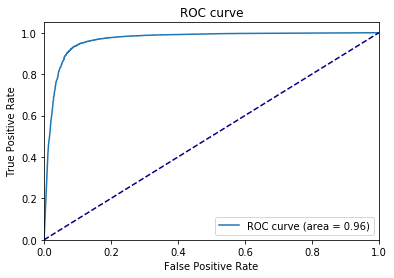

In [12]:
plt.plot(scores_q1['roc_curve']['fpr'],
         scores_q1['roc_curve']['tpr'],
         label='ROC curve (area = %0.2f)' %scores_q1['auc'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

#### My comment
I assumed that the purpose of the question is to create another classifier with features from both packages and to compare it to the classifier I created in question 1. Here too score 5 will be considered as positive sentiment and score 1 will be considered as negative sentiment.

In [13]:
# Using afinn package
afinn = Afinn()
train['afinn_score'] = train['Text'].apply(lambda t: afinn.score(t))
test['afinn_score'] = test['Text'].apply(lambda t: afinn.score(t))

# Using TextBlob package
train['polarity'] = train['Text'].apply(lambda t: TextBlob(t).sentiment.polarity)
train['subjectivity'] = train['Text'].apply(lambda t: TextBlob(t).sentiment.subjectivity)
# train['blob_polarity_nb'] = train['Text'].apply(lambda t: TextBlob(t, analyzer=NaiveBayesAnalyzer()).sentiment.p_pos)

test['polarity'] = test['Text'].apply(lambda t: TextBlob(t).sentiment.polarity)
test['subjectivity'] = test['Text'].apply(lambda t: TextBlob(t).sentiment.subjectivity)
# test['blob_polarity_nb'] = test['Text'].apply(lambda t: TextBlob(t, analyzer=NaiveBayesAnalyzer()).sentiment.p_pos)

train

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 72)"

Note that increasing the degree of parallelism also increases the memory footprint.

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1
15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5


In [14]:
# Creating the classifier with this question's features
features_list = ['polarity', 'subjectivity', 'afinn_score']
cls_2 = tc.classifier.create(train,features=features_list, target="Score")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 160387

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.177356     | 0.900447          | 0.900321            | 0.513714          | 0.513325            |

| 2         | 0.320193     | 0.900852          | 0.899845            | 0.416371          | 0.415691            |

| 3         | 0.462776     | 0.901476          | 0.900797            | 0.357274          | 0.356270            |

| 4         | 0.623759     | 0.901014          | 0.900678            | 0.319515          | 0.318149            |

| 5         | 0.770071     | 0.901208          | 0.901392            | 0.294860          | 0.293547            |

| 10        | 1.515038     | 0.902586          | 0.901511            | 0.251779          | 0.250716            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 160387

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.182970     | 0.893389          | 0.894136            | 0.322547          | 0.318547            |

| 2         | 0.327936     | 0.898695          | 0.899370            | 0.308759          | 0.305579            |

| 3         | 0.479261     | 0.900029          | 0.899607            | 0.306158          | 0.304005            |

| 4         | 0.627503     | 0.899400          | 0.900440            | 0.306371          | 0.304694            |

| 5         | 0.770257     | 0.899848          | 0.899370            | 0.307222          | 0.305102            |

| 10        | 1.493020     | 0.900142          | 0.899251            | 0.306762          | 0.304407            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 160387

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.173604     | 0.900447          | 0.900321            | 0.302134          | 0.300598            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 160387

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.066443     | 0.876786          | 0.879029            |

| 1         | 4        | 1.000000  | 0.182589     | 0.877128          | 0.879148            |

| 2         | 6        | 1.000000  | 0.305567     | 0.878812          | 0.880933            |

| 3         | 7        | 1.000000  | 0.400492     | 0.879491          | 0.881884            |

| 4         | 9        | 1.000000  | 0.516119     | 0.891693          | 0.893541            |

| 9         | 15       | 1.000000  | 0.971545     | 0.891051          | 0.893898            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 160387

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.071315     | 0.886855          | 0.888188            |

| 2         | 3        | 0.149759     | 0.895341          | 0.896634            |

| 3         | 4        | 0.244233     | 0.897330          | 0.898537            |

| 4         | 5        | 0.322188     | 0.898065          | 0.899370            |

| 5         | 6        | 0.404999     | 0.898078          | 0.899489            |

| 6         | 7        | 0.492689     | 0.898078          | 0.899489            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.9015106458903295
PROGRESS: RandomForestClassifier          : 0.8992506244796004
PROGRESS: DecisionTreeClassifier          : 0.9003211609373142
PROGRESS: SVMClassifier                   : 0.8938979421910312
PROGRESS: LogisticClassifier              : 0.8994885214702034
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [15]:
scores_q2 = cls_2.evaluate(test)
scores_q2

{'accuracy': 0.899656926534958,
 'auc': 0.8821092138008778,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        5        |  3446 |
 |      1       |        1        |  1971 |
 |      5       |        1        |  795  |
 |      5       |        5        | 36053 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9444509934902484,
 'log_loss': 0.257087380583235,
 'precision': 0.9127572849945568,
 'recall': 0.9784248805905341,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 36848 | 5417 |
 |   1e-05   | 1.0 | 1.0 | 36848 | 5417 |
 |   2e-05   | 1

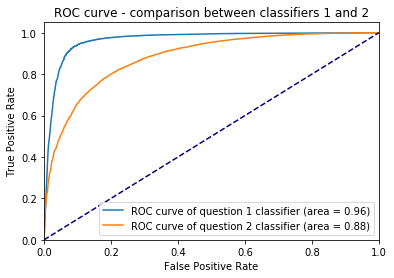

In [16]:
plt.plot(scores_q1['roc_curve']['fpr'],
         scores_q1['roc_curve']['tpr'],
         label='ROC curve of question 1 classifier (area = %0.2f)' %scores_q1['auc'])
plt.plot(scores_q2['roc_curve']['fpr'],
         scores_q2['roc_curve']['tpr'],
         label='ROC curve of question 2 classifier (area = %0.2f)' %scores_q2['auc'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve - comparison between classifiers 1 and 2')
plt.show()

**Question 3:**  Select a reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

#### My comment
I chose Yelp reviews dataset.

In [22]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) # pre-trained word2vec 
sf_yelp = tc.SFrame.read_csv("yelp.csv")
sf_yelp

Finished parsing file /data/home/yuvalhef/test/yelp.csv

Parsing completed. Parsed 100 lines in 0.070062 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,int,str,str,str,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /data/home/yuvalhef/test/yelp.csv

Parsing completed. Parsed 10000 lines in 0.081898 secs.

business_id,date,review_id,stars,text,type
9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here onmy birthday for break ...,review
ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why somepeople give bad reviews ...,review
6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Riceis so good and I also ...,review
_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVEChaparral Dog Park!!! ...",review
6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager ScottPetello is a good egg!!! ...,review
-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simplyput, beautiful. Full ...",review
zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doingand drive here. After I ...,review
hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have totravel far to make my ...",review
wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happyhour! Prices are amaz ...,review
nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his uniquetalents with everything ...,review


In [23]:
# As in the lecture, positive reviews are those that got rating of 4 or more and negative are 2 or less.
def label2sentiment(label):
    if label >= 4:
        return "Positive"
    else:
        return "Negative"

sf_yelp = sf_yelp[sf_yelp['stars'] != 3]
sf_yelp['sentiment'] = sf_yelp['stars'].apply(lambda label: label2sentiment(label))
sf_yelp

business_id,date,review_id,stars,text,type
9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here onmy birthday for break ...,review
ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why somepeople give bad reviews ...,review
6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Riceis so good and I also ...,review
_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVEChaparral Dog Park!!! ...",review
6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager ScottPetello is a good egg!!! ...,review
-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simplyput, beautiful. Full ...",review
zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doingand drive here. After I ...,review
hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have totravel far to make my ...",review
wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happyhour! Prices are amaz ...,review
nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his uniquetalents with everything ...,review


In [24]:
def txt2vector(txt):
    words = word_tokenize(txt)
    words = [w for w in words if w in model]
    if len(words) != 0:
        return np.mean([model[w] for w in words], axis=0)
    return None

l = []
for i in tqdm(range(len(sf_yelp))):
    text = sf_yelp[i]["text"]
    l.append(txt2vector(text))
sf_yelp['word2vec'] = l 

# Additional features for the second classifier
sf_yelp['words_1grams'] = tc.text_analytics.count_ngrams(sf_yelp['text'], n=1, method='word')
sf_yelp['words_2grams'] = tc.text_analytics.count_ngrams(sf_yelp['text'], n=2, method='word')
sf_yelp['words_dict'] = tc.text_analytics.count_words(sf_yelp['text'])
sf_yelp['blob_polarity'] = sf_yelp['text'].apply(lambda t: TextBlob(t).sentiment.polarity)
sf_yelp['blob_subjectivity'] = sf_yelp['text'].apply(lambda t: TextBlob(t).sentiment.subjectivity)
sf_yelp = sf_yelp.dropna()
sf_yelp

100%|██████████| 8539/8539 [00:31<00:00, 272.13it/s]


business_id,date,review_id,stars,text,type
9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here onmy birthday for break ...,review
ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why somepeople give bad reviews ...,review
6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Riceis so good and I also ...,review
_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVEChaparral Dog Park!!! ...",review
6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager ScottPetello is a good egg!!! ...,review
-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simplyput, beautiful. Full ...",review
zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doingand drive here. After I ...,review
hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have totravel far to make my ...",review
wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happyhour! Prices are amaz ...,review
nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his uniquetalents with everything ...,review


In [25]:
train, test = sf_yelp.random_split(0.8)

# first classifier with only the word2vec feature
cls_w2v = tc.classifier.create(train, features=['word2vec'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 6461

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients      : 301

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.351359     | 0.888872          | 0.845272            |

| 2         | 3        | 0.632461     | 0.914255          | 0.851003            |

| 3         | 4        | 0.904997     | 0.920601          | 0.862464            |

| 4         | 5        | 1.194804     | 0.924470          | 0.868195            |

| 5         | 6        | 1.474802     | 0.925553          | 0.865330            |

| 7         | 8        | 2.001271     | 0.925399          | 0.865330            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

SVM:

--------------------------------------------------------

Number of examples          : 6461

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients    : 301

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.064188  | 0.060237     | 0.799412          | 0.790831            |

| 1         | 13       | 2.831386  | 0.215872     | 0.799412          | 0.790831            |

| 2         | 18       | 0.038685  | 0.337113     | 0.799412          | 0.790831            |

| 3         | 21       | 0.033805  | 0.446735     | 0.799412          | 0.790831            |

| 4         | 25       | 0.709908  | 0.566207     | 0.799412          | 0.790831            |

| 9         | 35       | 1.000000  | 1.039532     | 0.894289          | 0.859599            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.8653295128939829
PROGRESS: SVMClassifier                   : 0.8595988538681948
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [26]:
# evaluation of the classifier

scores_1 = cls_w2v.evaluate(test)
scores_1

{'accuracy': 0.9143518518518519,
 'auc': 0.9397596591379168,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Positive   |     Positive    |  1346 |
 |   Negative   |     Positive    |   72  |
 |   Positive   |     Negative    |   76  |
 |   Negative   |     Negative    |  234  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9478873239436619,
 'log_loss': 0.2456967107519239,
 'precision': 0.9492242595204513,
 'recall': 0.9465541490857946,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+------+-----+
 | threshold |        fpr         | tpr |  p   |  n  |
 +-----------+--------------------+-----+------+-----+
 |    0.0    |        1.0         | 1.0 | 1422 | 306 |
 |  

In [27]:
features_list = ['words_dict', 'words_1grams', 'words_2grams', 'word2vec', 'blob_polarity']

# second classifier with additional features
cls_add = tc.classifier.create(train, features=features_list, target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 6472

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 317883

Number of coefficients      : 317884

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 6        | 0.021010  | 0.821681     | 0.798517          | 0.807692            |

| 1         | 11       | 1.785815  | 1.558178     | 0.905284          | 0.807692            |

| 2         | 12       | 1.785815  | 1.754596     | 0.972188          | 0.831361            |

| 3         | 13       | 1.785815  | 1.944087     | 0.990111          | 0.863905            |

| 4         | 14       | 1.785815  | 2.136080     | 0.998609          | 0.878698            |

| 9         | 19       | 1.785815  | 3.127000     | 1.000000          | 0.887574            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 6472

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 317883

Number of coefficients    : 317884

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 6        | 0.022847  | 0.873779     | 0.798517          | 0.807692            |

| 1         | 11       | 1.941973  | 1.665674     | 0.914400          | 0.807692            |

| 2         | 12       | 1.941973  | 1.869909     | 0.410229          | 0.224852            |

| 3         | 14       | 0.481921  | 2.221112     | 0.983158          | 0.855030            |

| 4         | 15       | 0.602401  | 2.427343     | 0.989957          | 0.881657            |

| 9         | 20       | 1.000000  | 3.495037     | 0.999691          | 0.905325            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.8875739644970414
PROGRESS: SVMClassifier                   : 0.9053254437869822
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


In [29]:
scores_2 = cls_add.evaluate(test)
scores_2

{'accuracy': 0.9201388888888888, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Negative   |     Negative    |  242  |
 |   Negative   |     Positive    |   64  |
 |   Positive   |     Negative    |   74  |
 |   Positive   |     Positive    |  1348 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns], 'f1_score': 0.9513055751587862, 'precision': 0.9546742209631728, 'recall': 0.9479606188466948}

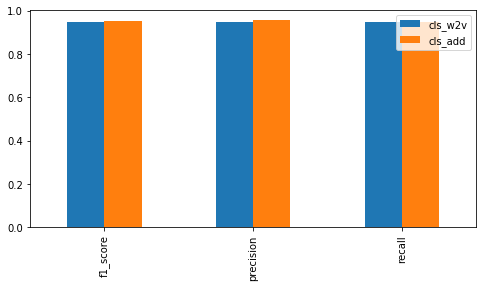

In [30]:
# comarisson of the two classifiers

cols = ['f1_score', 'precision', '']
f1_score = [scores_1['f1_score'], scores_2['f1_score']]
precision = [scores_1['precision'], scores_2['precision']]
recall = [scores_1['recall'], scores_2['recall']]
df = pd.DataFrame()
df['f1_score'] = f1_score
df['precision'] = precision
df['recall'] = recall
df.index = ['cls_w2v', 'cls_add']
df.T.plot.bar(figsize=(8, 4))